In [1]:
# extract and plot each detected face in a photograph
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
import cv2
import os
from PIL import Image
%matplotlib inline

In [2]:
test_faces_path = os.getcwd()+'\\test_faces\\'
check = os.path.isdir(test_faces_path)
if (not check):
    os.mkdir(test_faces)

In [3]:
# draw each face separately
def draw_box(file, result_list):
    
    # load the image
    data = plt.imread(file)
    
    # plot each face as a subplot
    for i in range(len(result_list)):
        
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        
        # define subplot
        plt.subplot(1, len(result_list), i+1)
        plt.axis('off')
        
        # plot face
        plt.imshow(data[y1:y2, x1:x2])
        
        # check if directory is present or not - if not then creates one
        filename = 'img'+str(i)+'.jpg'
        
        #writes the detected faces in specified directory
        cv2.imwrite(test_faces_path+filename, data[y1:y2, x1:x2])
        
    # show the plot
    plt.show()

Path to file:  C:\Users\arvee\Desktop\Attendance_calc\test2.jpg
Loading and Displaying image -> 


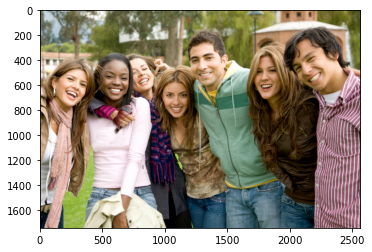

In [7]:
filename = 'test2.jpg'

ext = filename[-3:]
if ext != 'jpg' :

    im = Image.open(filename)
    rgb_im = im.convert('RGB')
    name = filename[:-4]+'.jpg'
    rgb_im.save(name)
    filename = name
    
path = os.getcwd()
path_img = os.path.join(path,filename)
# Displaying path to file
print("Path to file: ",path_img)

print("Loading and Displaying image -> ")
# load image from file
pixels = plt.imread(path_img)
# Displaying image
plt.imshow(pixels)

In [8]:
print("Creating MTCNN object for detection...")
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# print("Faces: ",faces)
print('Number of faces detected: ',len(faces))
# Deleting all previous images
# print(test_faces_path)
[os.remove(os.path.join(test_faces_path,file)) for file in os.listdir(test_faces_path) if file.endswith('.jpg')]

Creating MTCNN object for detection...
Number of faces detected:  7


[None, None]

Displaying Detected Faces and saving it in directory -> 


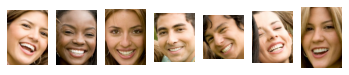

In [9]:
# display faces on the original image
print("Displaying Detected Faces and saving it in directory -> ")
draw_box(filename, faces)